<a href="https://colab.research.google.com/github/mukul-mschauhan/GenerativeAI/blob/main/Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airline = pd.read_csv("/content/Tweets.csv")
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Take text and Sentiment...

df = airline.loc[:, ["airline_sentiment", "text"]]

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
# Want to see the list of special characters
mytext = pd.DataFrame(df.text)

import re

def special_chars(text):
    characters = re.findall("[A-Za-z0-9\s]", text)
    return(characters)

# Apply the function to each row in the text column and create a new column for special characters
mytext['special_characters'] = mytext['text'].apply(special_chars)

# Get the unique special characters found in the entire DataFrame
all_special_characters = set(char for sublist in mytext['special_characters'] for char in sublist)

# Convert the set of special characters to a sorted list (optional)
special_characters_list = sorted(list(all_special_characters))

# Display the list of special characters found
print("List of special characters/noise in the DataFrame:", special_characters_list)

List of special characters/noise in the DataFrame: ['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0']


In [ ]:
def noise(text):
    text = re.sub("@\w+", "", text)
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    return(text.strip())

mytext["cleansed"]=mytext.text.apply(noise)

In [ ]:
mytext.head()

,text,special_characters,cleansed
0,@VirginAmerica What @dhepburn said.,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , W, ...",What said
1,@VirginAmerica plus you've added commercials t...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , p, ...",plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , I, ...",I didnt today Must mean I need to take another...
3,@VirginAmerica it's really aggressive to blast...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , i, ...",its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , a, ...",and its a really big bad thing about it


In [ ]:
df["cleansed"] = df.text.apply(noise)
df.head()

,airline_sentiment,text,cleansed
0,neutral,@VirginAmerica What @dhepburn said.,What said
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,I didnt today Must mean I need to take another...
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [ ]:
# Remove stopwords
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop]
    return " ".join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["cleansed"] = df.cleansed.apply(remove_stopwords)

In [ ]:
# Lets tokenize and generate a list of tokens available

from nltk.tokenize import word_tokenize

# Approach
#newtokens = []
#for text in df.cleansed:
    #print(text)
    #for tokens in word_tokenize(text):
        #newtokens.append(tokens)

all_tokens = [tokens for text in df.cleansed for tokens in word_tokenize(text)]

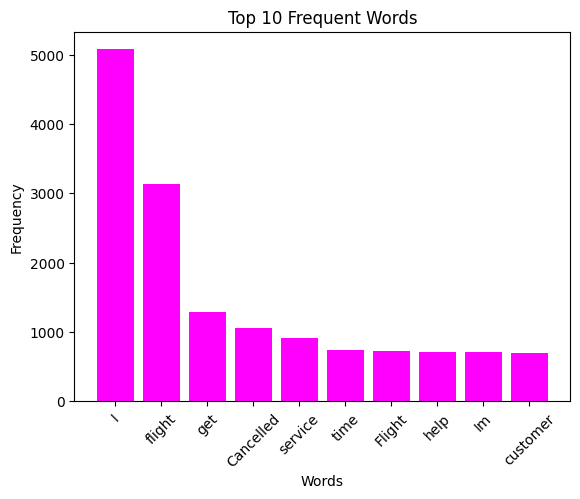

In [ ]:
from nltk.probability import FreqDist

freq_dist = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Token", "Freq"]).\
sort_values(ascending = False, by = "Freq")

plt.bar(freq_dist.Token[0:10], freq_dist.Freq[0:10], color = "magenta")
plt.title("Top 10 Frequent Words")
plt.xlabel("Words")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.show()

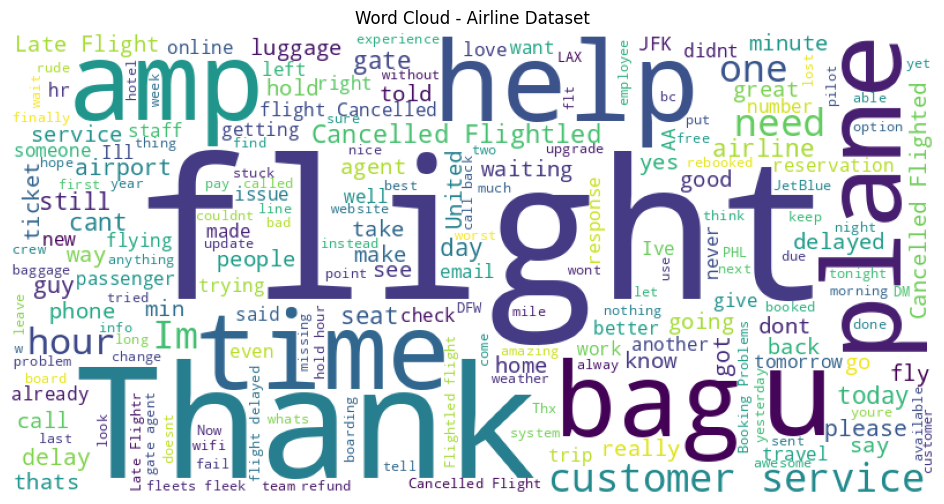

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud using all_tokens
wordcloud = WordCloud(width = 800, height = 400,
                      background_color = "white").generate(" ".join(all_tokens))

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.title("Word Cloud - Airline Dataset")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(stop_words = "english", min_df = 5)
# Fit and Transform
X = cv.fit_transform(df.cleansed).toarray()

# Feature Names
names = cv.get_feature_names_out()

print(X.shape)
print(len(names))

(14640, 2752)
2752


In [ ]:
# tf-idf
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df.cleansed).toarray()

In [ ]:
def target(x):
  if x=="negative":
    return(-1)
  elif x=="positive":
    return(1)
  else:
    return(0)

df["target"] = df.airline_sentiment.apply(target)

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

# Train test split basis Count Vectorizer Data
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X,
                                                                df.target,
                                                                test_size = 0.25,
                                                                random_state = 42,
                                                                stratify = df.target)


# Train test split basis Count Vectorizer Data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf,
                                                                df.target,
                                                                test_size = 0.25,
                                                                random_state = 42,
                                                                stratify = df.target)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and Train the Model

logreg = LogisticRegression(solver='liblinear')
pred = logreg.fit(X_train_cv, y_train_cv).predict(X_test_cv)

# Classification Report...

print(classification_report(y_test_cv, pred))

              precision    recall  f1-score   support

          -1       0.83      0.90      0.86      2294
           0       0.62      0.55      0.58       775
           1       0.75      0.65      0.70       591

    accuracy                           0.78      3660
   macro avg       0.74      0.70      0.72      3660
weighted avg       0.78      0.78      0.78      3660



In [ ]:
# Tfidf Data Model
# Create and Train the Model

logreg = LogisticRegression()
pred = logreg.fit(X_train_tf, y_train_tf).predict(X_test_tf)

# Classification Report...

print(classification_report(y_test_tf, pred))

              precision    recall  f1-score   support

          -1       0.79      0.95      0.86      2294
           0       0.67      0.45      0.54       775
           1       0.83      0.55      0.66       591

    accuracy                           0.78      3660
   macro avg       0.76      0.65      0.69      3660
weighted avg       0.77      0.78      0.76      3660



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

pred = gbm.fit(X_train_tf, y_train_tf).predict(X_test_tf)

# Classification Report...

print(classification_report(y_test_tf, pred))

              precision    recall  f1-score   support

          -1       0.72      0.96      0.82      2294
           0       0.75      0.13      0.21       775
           1       0.74      0.55      0.63       591

    accuracy                           0.72      3660
   macro avg       0.74      0.55      0.56      3660
weighted avg       0.73      0.72      0.66      3660

